# part 0. preparation

In [107]:
#load packages

import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import sklearn as sl
from sklearn import preprocessing
pd.set_option('display.float_format',lambda x:'%.3f' %x)

In [108]:
#load data

tv = pd.read_csv('TVdata.txt',sep = ',',header = 0,lineterminator = '\n')
tv.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


In [109]:
# shape of tv data set

print ('There are ' + str(tv.shape[0]) + ' rows and ' + str(tv.shape[1]) + ' columns in our data set')

There are 4226 rows and 16 columns in our data set


# part 1.  exploratory data analysis

In [110]:
# 1.1 check duplicated data

if not any(tv['video_id'].duplicated()):
    print ('There is no duplicated record in video_id column')

There is no duplicated record in video_id column


### 1.2 numerical features

In [111]:
# 1.2.1 summary data
    
print (tv.dtypes)
print (tv.drop(['video_id','release_year'],axis = 1).describe(percentiles = [.1,.25,.5,.75,.95]))
print ((tv==0).sum())


video_id                           int64
cvt_per_day                      float64
weighted_categorical_position      int64
weighted_horizontal_poition        int64
import_id                         object
release_year                       int64
genres                            object
imdb_votes                         int64
budget                             int64
boxoffice                          int64
imdb_rating                      float64
duration_in_mins                 float64
metacritic_score                   int64
awards                            object
mpaa                              object
star_category                    float64
dtype: object
       cvt_per_day  weighted_categorical_position  \
count     4226.000                       4226.000   
mean      4218.630                          7.783   
std      13036.080                          6.134   
min          2.188                          1.000   
10%        141.985                          3.000   
25%        3

According the description of percentiles of each column, there are 4 features have more than 25% of missing data: budget,boxoffie,metacritic_score,star_category;there are 2 features have less than 10% of missing data: imdb_votes,imdb_rating.

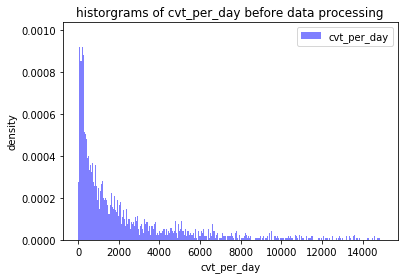

In [112]:
# 1.2.2 cvt_per_day overview

plt.hist(tv['cvt_per_day'].values,bins = range(0,15000,30),alpha = 0.5,color = 'b',label = 'cvt_per_day',density = True)
plt.legend(loc = 'upper right')
plt.title('historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

This is a typical long tail distribution where majority of videos have low cvt_per_day and only a few videos have very high cvt_per_day

In [43]:
# 1.2.3 correlation among numerical features

corr = tv[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition','imdb_votes','budget',
'boxoffice','imdb_rating','duration_in_mins','metacritic_score','star_category']].corr()
corr


,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
imdb_votes,0.298,-0.064,-0.221,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,0.322,0.315,0.465,0.347,0.327,1.000,0.452
star_category,0.247,-0.123,-0.168,0.225,0.322,0.322,0.192,0.309,0.452,1.000


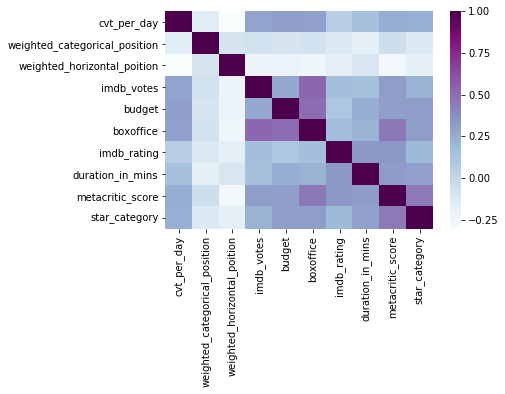

In [113]:
# correlation heatmap

sns.heatmap(corr,cmap = 'BuPu')

To make some inferences before running any models, we can observe the correlation heatmap.
Most features have under 0.5 correlation.
there are higher than 0.5 corr among these features: (boxoffice,imdb_votes),(budget,boxoffice),(metacritic_score,star_category),(metacritic_score,box_office).
No features pair is completely identical so we will keep all numerical features.

### 1.3 categorical features

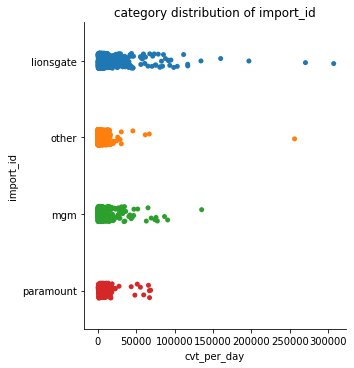

       index  import_id
0      other       2963
1  lionsgate        677
2        mgm        445
3  paramount        141


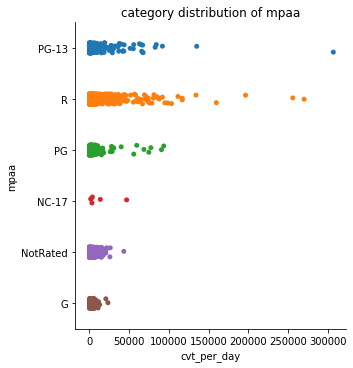

      index  mpaa
0  NotRated  2158
1         R  1158
2     PG-13   426
3        PG   353
4         G   125
5     NC-17     6


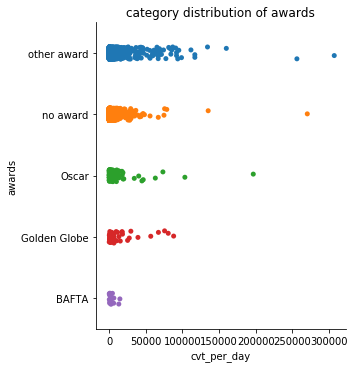

          index  awards
0      no award    2569
1   other award    1453
2         Oscar     141
3  Golden Globe      44
4         BAFTA      19


In [114]:
# 1.3.1 simple categorical features

#import_id
sns.catplot(x='cvt_per_day',y='import_id',data = tv,jitter = True)
plt.title('category distribution of import_id')
plt.show()
print(tv['import_id'].value_counts().reset_index())

#mpaa
sns.catplot(x='cvt_per_day',y='mpaa',data = tv,jitter = True)
plt.title('category distribution of mpaa')
plt.show()
print(tv['mpaa'].value_counts().reset_index())

#awards
sns.catplot(x='cvt_per_day',y='awards',data = tv,jitter = True)
plt.title('category distribution of awards')
plt.show()
print(tv['awards'].value_counts().reset_index())

These three categorical features are relatively easy to use since they have low level of classes.
we can simply use one-hot-encoding to transform them into numeric.

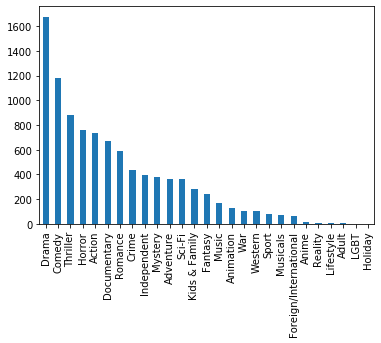

In [115]:
# 1.3.2 distribution of splitted genres

gen_split = tv['genres'].str.get_dummies(sep=',').sum()
gen_split.sort_values(ascending = False).plot.bar()

As we can see, there are 6 genres including Anime,reality,lifestyle,adult,lgbt,holiday have low frequencies. therefore,during feature processing, they would be grouped as 'other' in the 'genres' feature.

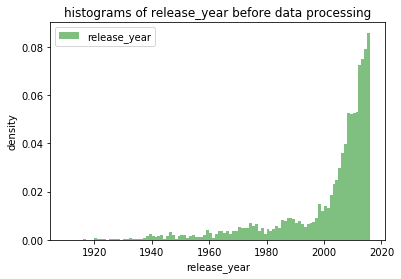

count   4226.000
mean    2001.057
std       17.497
min     1916.000
10%     1974.000
20%     1991.000
30%     2001.000
40%     2006.000
50%     2008.000
60%     2010.000
70%     2012.000
80%     2013.000
90%     2014.000
max     2017.000
Name: release_year, dtype: float64


In [116]:
# 1.3.3 distribution of release_year


plt.hist(tv['release_year'].values,bins = range(1910,2017,1),alpha = 0.5, color = 'g',label = 'release_year', density = True)
plt.legend(loc = 'upper left')
plt.title('histograms of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('density')
plt.show()

print(tv['release_year'].describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9]))

The release of video varies through a wide range. considering the popularity of a video usually decays over time,the release_year should be bucketed based on the release_year range.

# part 2. feature engineering

### 2.1 categorical features

There are 5 categorical features: import_id,mpaa,awards,genres and release_year. there's no missing data in them and can be converted into dummy variables.

The first 3 have relatively small sub-types, they can be easily converted into dummies.

The genres have 27 different sub-types, 6 of them are rarely observed(as mentioned earlier). It's reasonable to group these 6 subtypes into 1. Note that a video may have more than one gener, in the feature preprocessing, all gernes are handled individually.

The release_year is bined into 10 buckets based on the year range between 1917 and 2017.

In [117]:
# convert 3 simple categorical variables into dummies
d_import_id = pd.get_dummies(tv['import_id']).astype(np.int64)
d_mpaa = pd.get_dummies(tv['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(tv['awards']).astype(np.int64)

In [49]:
# convert 'genres' into dummies
d_genres = pd.DataFrame()
for genre in ['Action','Adult','Adventure','Animation','Anime','Comedy','Crime','Documentary','Drama','Fantasy','Foreign/International','Holiday',
              'Horror','Independent','Kids & Family','LGBT','Lifestyle','Music','Musical','Mystery','Reality','Romance','Sci-Fi','Sports','Thriller','War','Western']:
    gen_lst = []
    for i in range(4226):
        if genre in tv['genres'][i]:
            gen_lst.append(1)
        else:
            gen_lst.append(0)
    d_genres[genre] = pd.Series(gen_lst).values
# combine 6 smallest genres into a new genre 'misc_gen' ,then drop these 6 cols
d_genres['other'] = d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime','Reality','Lifestyle','Adult','LGBT','Holiday'],inplace = True,axis = 1)
d_genres.shape
print(d_genres)

      Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
0          1          0          0       0      0            0      1   
1          0          0          0       1      1            0      0   
2          0          0          0       0      1            0      1   
3          1          0          0       0      0            1      1   
4          0          0          0       0      1            1      0   
5          0          0          0       1      0            0      0   
6          1          1          0       0      0            0      0   
7          0          0          0       0      0            0      1   
8          0          0          0       0      1            0      0   
9          1          1          0       0      0            0      0   
10         0          0          0       0      1            0      1   
11         1          0          0       0      0            0      0   
12         0          0          0       0      1  

In [118]:
# bin release_year and convert into dummies according to count percentile

bin_year = [1916,1974,1991,2001,2006,2008,2010,2012,2013,2014,2017]
year_range = ['1916-1974','1974-1991','1991-2001','2001-2006','2006-2008','2008-2010','2010-2012','2012-2013','2013-2014','2014-2017']
year_bin = pd.cut(tv['release_year'],bin_year,labels = year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)
d_year.shape
print(d_year)

      1916-1974  1974-1991  1991-2001  2001-2006  2006-2008  2008-2010  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          1          0   
4             0          0          0          0          0          0   
5             0          0          1          0          0          0   
6             0          0          0          0          0          0   
7             0          0          0          0          0          0   
8             0          0          0          0          0          0   
9             0          0          0          0          0          1   
10            0          0          0          1          0          0   
11            0          0          0          0          0          0   
12            0          0          0 

In [119]:
# combine dataframes together
# new dataframe, drop the previous categorical features, add new dummy variables, check for null
TV_temp = tv.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1)
newTV = pd.concat([TV_temp, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis=1)
print (newTV.shape)
print (pd.isnull(newTV).any(1).to_numpy().nonzero()[0])
print (newTV.head())
newTV_0 = newTV.copy() # a copy of newTV

(4226, 58)
[]
   video_id  cvt_per_day  weighted_categorical_position  \
0    385504   307127.606                              1   
1    300175   270338.426                              1   
2    361899   256165.867                              1   
3    308314   196622.721                              3   
4    307201   159841.652                              1   

   weighted_horizontal_poition  imdb_votes    budget  boxoffice  imdb_rating  \
0                            3       69614  15000000   42930462        6.500   
1                            3       46705  15000000    3301046        6.500   
2                            3      197596  26000000   37397291        7.300   
3                            4      356339  15000000   15700000        7.600   
4                            3       46720  27220000    8551228        6.400   

   duration_in_mins  metacritic_score  ...  1916-1974  1974-1991  1991-2001  \
0           112.301                51  ...          0          0       

feature space holds 4226 observations and 58 features in total
there is no null values. newtv_0 can be kept as raw dataframe before any further feature processing, e.g replace 0 with null, missing data imputation etc.

### 2.2 handling missing data

Among the 10 numerical features (not include video_id), 4 features have over 25% of missing values (shown as '0', which is not possible in reality):budget, boxoffice,metacritic_score,star_category. 2 features have less than 10% of missing data: imdb_votes,imdb_rating.
there are 3242 samples have at least one missing data.

In [120]:
# mark zero values as NaN
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)

# count the number of NaN values in each column
print (newTV.isnull().sum())

#count the number videos who have at least one missing data 
print ('videos having at least one null: ', newTV.isnull().any(axis=1).sum())

newTV.tail()

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
star_category                    1846
lionsgate                           0
mgm                                 0
other                               0
paramount                           0
G                                   0
NC-17                               0
NotRated                            0
PG                                  0
PG-13                               0
R                                   0
BAFTA                               0
Golden Globe                        0
Oscar                               0
no award                            0
other award                         0
Action      

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
4221,160848,9.726,3,32,14.000,nan,nan,7.800,4.312,nan,...,0,0,0,0,0,1,0,0,0,0
4222,365178,7.913,29,35,nan,nan,nan,nan,4.879,nan,...,0,0,0,0,0,0,0,1,0,0
4223,11615,2.936,3,27,505.000,nan,nan,7.100,110.350,nan,...,0,0,0,0,1,0,0,0,0,0
4224,26365,2.867,4,15,5.000,100000.000,nan,6.000,79.633,nan,...,0,0,0,1,0,0,0,0,0,0
4225,11229,2.188,7,35,80.000,nan,nan,7.600,53.618,nan,...,0,0,0,1,0,0,0,0,0,0


for imdb_votes and imdb_rating, they always show null together,which is reasonable, since when a imdb_votes is missing,the imdb_rating is also missing.
for all 6 features with missing data, let's impute them with their mean value.

In [126]:
# fill missing values with the column mean
newTV_i1 = newTV.copy()
newTV_i1['budget']=newTV_i1['budget'].fillna(newTV_i1['budget'].mean())
newTV_i1['boxoffice']=newTV_i1['boxoffice'].fillna(newTV_i1['boxoffice'].mean())
newTV_i1['metacritic_score']=newTV_i1['metacritic_score'].fillna(newTV_i1['metacritic_score'].mean())
newTV_i1['star_category']=newTV_i1['star_category'].fillna(newTV_i1['star_category'].mean())
newTV_i1['imdb_votes']=newTV_i1['imdb_votes'].fillna(newTV_i1['imdb_votes'].mean())
newTV_i1['imdb_rating']=newTV_i1['imdb_rating'].fillna(newTV_i1['imdb_rating'].mean())

newTV_i1.tail()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
4221,160848,9.726,3,32,14.000,5129256.081,10386207.734,7.800,4.312,55.605,...,0,0,0,0,0,1,0,0,0,0
4222,365178,7.913,29,35,7035.630,5129256.081,10386207.734,5.723,4.879,55.605,...,0,0,0,0,0,0,0,1,0,0
4223,11615,2.936,3,27,505.000,5129256.081,10386207.734,7.100,110.350,55.605,...,0,0,0,0,1,0,0,0,0,0
4224,26365,2.867,4,15,5.000,100000.000,10386207.734,6.000,79.633,55.605,...,0,0,0,1,0,0,0,0,0,0
4225,11229,2.188,7,35,80.000,5129256.081,10386207.734,7.600,53.618,55.605,...,0,0,0,1,0,0,0,0,0,0


newtv_i1 have the feature processing as:filling the missing data in budget, boxoffice,metacritic_score,star_category,imdb_votes,imdb_rating with mean.it will be tested in the upcoming models.

### 2.3 feature scaling

the impact of different scaling methods on the model performance is small. in the following model training and selections, the standard scaling data is used.

In [129]:
#Standard scaling
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_sc = newTV_i1.copy()

sc_scale = preprocessing.StandardScaler().fit(newTV_sc[scale_lst])
newTV_sc[scale_lst] = sc_scale.transform(newTV_sc[scale_lst])

newTV_sc.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,...,0,0,0,0,0,0,0,1,0,0


# part 3. Model training

split the data into training set and testing set with a 85/15 partition.

In [131]:
# splitting data
from sklearn.model_selection import train_test_split


model_train,model_test = train_test_split(newTV_sc,test_size=0.15,random_state = 3)

model_train_x = model_train.drop(['video_id','cvt_per_day'],axis = 1)

model_test_x = model_test.drop(['video_id','cvt_per_day'],axis = 1)

model_train_y = model_train['cvt_per_day']

model_test_y = model_test['cvt_per_day']

model_train.head()


,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
168,306829,17896.576,-0.128,-1.358,0.172,2.661,2.399,0.542,0.088,0.191,...,0,0,1,0,0,0,0,0,0,0
1052,372289,3361.810,-0.291,1.424,-0.196,-0.555,0.000,-0.365,0.897,-2.954,...,0,0,0,1,0,0,0,0,0,0
1201,178053,2856.678,0.362,-0.936,-0.033,-0.541,-0.265,0.333,0.454,0.191,...,0,0,1,0,0,0,0,0,0,0
1921,339342,1428.862,-1.106,-1.020,-0.156,0.000,0.000,0.542,-0.005,0.000,...,0,0,0,1,0,0,0,0,0,0
164,314537,18396.443,-0.454,-0.936,1.417,14.129,3.576,0.681,2.300,0.327,...,0,0,0,1,0,0,0,0,0,0


### 3.1 linear model

122.06107238906554 0.36457853302954235


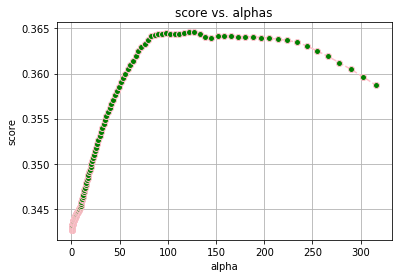

The optimaized alpha and score of Lasso linear is:  122.06107238906554 0.36457853302954235


Lasso(alpha=122.06107238906554, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
# 3.1.1 lasso linear regression
from sklearn.model_selection import train_test_split

from sklearn import linear_model

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


lr_train,lr_validate = train_test_split(model_train,test_size = 0.15,random_state = 0)

lr_train_x = lr_train.drop(['video_id','cvt_per_day'],axis = 1)

lr_validate_x = lr_validate.drop(['video_id','cvt_per_day'],axis = 1)

lr_train_y = lr_train['cvt_per_day']

lr_validate_y = lr_validate['cvt_per_day']


alphas = np.logspace (-0.3,2.5,num =150)
# alphas = 0.000000000001

scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')

for i,a in enumerate(alphas):
    lr = linear_model.Lasso()
    lr.set_params(alpha = a)
    lr.fit(lr_train_x,lr_train_y)
    scores[i] = lr.score(lr_validate_x,lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lr_save = lr
        
print (opt_a,max_score)


plt.plot(alphas,scores,color='pink',linestyle='dashed',marker='o',markerfacecolor='green',markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alphas')
plt.show()

print ('The optimaized alpha and score of Lasso linear is: ', opt_a, max_score)


# combine the validate data and training data, use the optimal alpham re-train the model
lr_f = linear_model.Lasso()
lr_f.set_params(alpha = opt_a)
lr_f.fit(model_train_x,model_train_y)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: once
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34347371130.654182, tolerance: 48022560.445868395
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34356705394.73084, tolerance: 48022560.445868395
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34368478680.81879, tolerance: 48022560.445868395
  positive)
//anaconda3/lib/python3.7/site-packages/sklea

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48617853221.23821, tolerance: 48022560.445868395
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48328334589.55596, tolerance: 48022560.445868395
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47386303528.0482, tolerance: 48022560.445868395
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4103830343

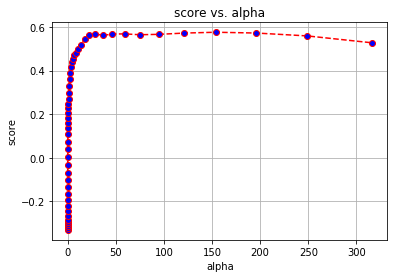

The optimaized alpha and score of Lasso polynomial is:  154.08313356160554 0.5764032200604299


Lasso(alpha=154.08313356160554, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [133]:
# lasso polynomial features
import warnings
warnings.warn("once")
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train, test_size=0.15, random_state = 0)
lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-2.6, 2.5, num=50)

scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lr_p = linear_model.Lasso()
    lr_p.set_params(alpha = a)
    lr_p.fit(lr_train_xp, lr_train_y)
    scores[i] = lr_p.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lr_p_save = lr_p
        
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso polynomial is: ', opt_a, max_score)

# combine the validate data and training data,use optimal alpha retrain the model
lr_train_xp1 = poly.fit_transform(model_train_x)

lr_fp = linear_model.Lasso()
lr_fp.set_params(alpha = opt_a)
lr_fp.fit(lr_train_xp1, model_train_y)


163.97026580002054 0.3528374216334105


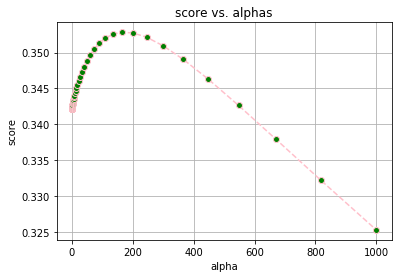

The optimaized alpha and score of Ridge linear is:  163.97026580002054 0.3528374216334105


Ridge(alpha=163.97026580002054, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [134]:
# 1.3.2 ridge linear regression
#use the same data partition as lasso regression

alphas = np.logspace (-10,3,num =150)

scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')

for i,a in enumerate(alphas):
    rr = linear_model.Ridge()
    rr.set_params(alpha = a)
    rr.fit(lr_train_x,lr_train_y)
    scores[i] = rr.score(lr_validate_x,lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        rr_save = rr
        
print (opt_a,max_score)


plt.plot(alphas,scores,color='pink',linestyle='dashed',marker='o',markerfacecolor='green',markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alphas')
plt.show()

print ('The optimaized alpha and score of Ridge linear is: ', opt_a, max_score)

# add the 15% validate data, use the optimal alpha, re-train the model

rr_f = linear_model.Ridge()
rr_f.set_params(alpha = opt_a)
rr_f.fit(model_train_x, model_train_y)


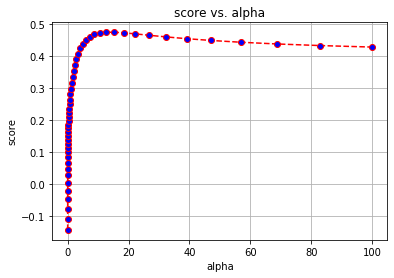

The optimaized alpha and score of Ridge linear is:  0.47385091347400277 15.264179671752318


Ridge(alpha=15.264179671752318, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [135]:
# ridge polynomial features

# Use the same training data set as Lasso (polynomial features)

alphas = np.logspace (-2, 2, num=50)

scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    rr_p = linear_model.Ridge()
    rr_p.set_params(alpha = a)
    rr_p.fit(lr_train_xp, lr_train_y)
    scores[i] = rr_p.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        rr_p_save = rr_p
        
plt.plot(alphas, scores, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Ridge linear is: ',max_score, opt_a)


# use the optimal alpha and retrain the model
lr_train_xp1 = poly.fit_transform(model_train_x)

rr_fp = linear_model.Ridge()
rr_fp.set_params(alpha = opt_a)
rr_fp.fit(lr_train_xp1, model_train_y)


### 3.2 None-linear model

Random Forests use an ensemble of decision trees and bootstrap the training sample to deal with the overfitting problem. 

In [138]:
# 3.2.1 random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV


rf_train, rf_test = train_test_split(model_train, test_size=0.15, random_state = 0)

rf_train_x = rf_train.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_test_x = rf_test.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_train_y = rf_train['cvt_per_day']
rf_test_y = rf_test['cvt_per_day']

param_grid = {'n_estimators': [54, 55, 56, 57, 58, 59, 60, 62],'max_depth': [7,8,9,10,11,12,13, 14, 15, 16, 17]}

rf = RandomForestRegressor(random_state=2, max_features = 'sqrt')
grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(rf_train_x, rf_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12,

In [139]:
grid_rf.best_params_ 

{'max_depth': 17, 'n_estimators': 58}

In [140]:
grid_rf.cv_results_

{'mean_fit_time': array([0.08705525, 0.07709093, 0.09351983, 0.07918782, 0.08001184,
        0.08175268, 0.11916761, 0.10889716, 0.09079132, 0.0855557 ,
        0.08458619, 0.08613343, 0.0870182 , 0.08922739, 0.08970237,
        0.09232183, 0.09055514, 0.09168987, 0.09358974, 0.09440775,
        0.09516096, 0.09751625, 0.09931588, 0.10259185, 0.10008349,
        0.10368657, 0.10565348, 0.10878215, 0.10636096, 0.1109324 ,
        0.11049852, 0.11487861, 0.10911374, 0.11940432, 0.11419158,
        0.11549668, 0.11803002, 0.1206326 , 0.1213789 , 0.12668405,
        0.11899128, 0.12222462, 0.12485528, 0.12585096, 0.12709217,
        0.13102822, 0.1347014 , 0.14033461, 0.1306128 , 0.13287454,
        0.13705883, 0.13623905, 0.14003553, 0.14239454, 0.14543881,
        0.14946094, 0.14075241, 0.14101224, 0.1480937 , 0.15131078,
        0.15162573, 0.15270944, 0.15581503, 0.15830779, 0.15002861,
        0.15220346, 0.15437436, 0.16129713, 0.16048136, 0.16652317,
        0.16698694, 0.17165465,

Text(69.0, 0.5, 'n_est')

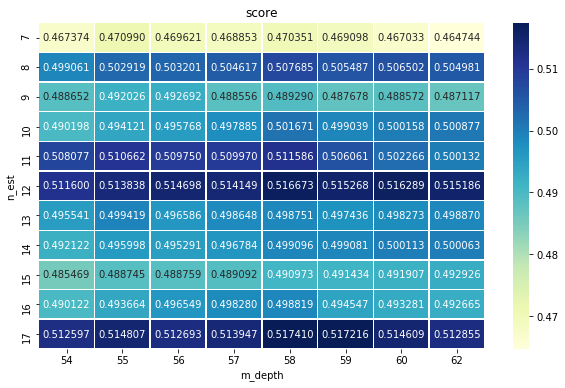

In [142]:
# plot the effect of different number of trees and maximum tree-depth druing cross validation 
scores = grid_rf.cv_results_['mean_test_score']

n_est = [54, 55, 56, 57, 58, 59, 60, 62]
m_depth=[7,8,9,10,11,12, 13, 14, 15, 16, 17]
scores = np.array(scores).reshape(len(m_depth), len(n_est))
val = scores.tolist()
val
df= pd.DataFrame(val,columns = n_est,index = m_depth)

plt.figure(figsize=(10,6))
ax = sns.heatmap(df,annot=True,fmt='f',linewidths=.5,cmap="YlGnBu")
ax.set_title('score')
ax.set_xlabel('m_depth')
ax.set_ylabel('n_est')


In [143]:
# add both training and validation data together as the new training data
rf = RandomForestRegressor(random_state=2, max_features = 'sqrt', max_depth= 17, n_estimators=58)
rf.fit(model_train_x, model_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=58,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

the best random forrest estimator has depth of 17 and 58 estimators

# part 4. model evaluation

### 4.1 Lasso test with linear features (lr_f)

In [144]:
# lasso regression with linear features

lr_f_score = lr_f.score(model_test_x, model_test_y)
pred_y = lr_f.predict(model_test_x)

# The mean squared error and root mean square error
MSE_lr_f = mean_squared_error(model_test_y, pred_y)
RMSE_lr_f = sqrt(mean_squared_error(model_test_y, pred_y))

print ('lasso_f score: ', lr_f_score)
print ('Mean square error of lasso_f: ', MSE_lr_f)
print ('Root mean squared error of lasso_f:', RMSE_lr_f)
#print ('Coefficients of lasso_f: ', lr_f.coef_)

lasso_f score:  0.09954927178753703
Mean square error of lasso_f:  238953191.99910036
Root mean squared error of lasso_f: 15458.110880670392


### 4.2 Lasso test with polynomial features (lr_fp)

In [145]:
# Lasso_fp test (with polynomial features)
model_test_xp = poly.fit_transform(model_test_x)
pred_y = lr_fp.predict(model_test_xp)

lr_fp_score = lr_fp.score(model_test_xp, model_test_y)
MSE_lr_fp = mean_squared_error(model_test_y, pred_y)
RMSE_lr_fp = sqrt(mean_squared_error(model_test_y, pred_y))

print ('lasso_fp score: ', lr_fp_score)
print ('Mean square error of lasso_fp: ', MSE_lr_fp)
print ('Root mean squared error of lasso_fp:', RMSE_lr_fp)
# print ('Coefficients of lasso_fp: ', lr_fp.coef_)

lasso_fp score:  -0.08248456394473891
Mean square error of lasso_fp:  287259628.6948836
Root mean squared error of lasso_fp: 16948.735312550125


### 4.3 Ridge test with linear features (rr_f)

In [146]:
# ridge regression with linear features

rr_f_score = rr_f.score(model_test_x, model_test_y)
pred_y = rr_f.predict(model_test_x)

# The mean squared error and root mean square error
MSE_rr_f = mean_squared_error(model_test_y, pred_y)
RMSE_rr_f = sqrt(mean_squared_error(model_test_y, pred_y))

print ('ridge_f score: ', lr_f_score)
print ('Mean square error of rr_f: ', MSE_rr_f)
print ('Root mean squared error of rr_f:', RMSE_rr_f)
#print ('Coefficients of lasso_f: ', rr_f.coef_)

ridge_f score:  0.09954927178753703
Mean square error of rr_f:  235181538.5693231
Root mean squared error of rr_f: 15335.629708926957


### 4.4 Ridge test with polynomial features (lr_fp)

In [147]:
# ridge_fp test (with polynomial features)
model_test_xp = poly.fit_transform(model_test_x)
pred_y = rr_fp.predict(model_test_xp)

rr_fp_score = rr_fp.score(model_test_xp, model_test_y)
MSE_rr_fp = mean_squared_error(model_test_y, pred_y)
RMSE_rr_fp = sqrt(mean_squared_error(model_test_y, pred_y))

print ('rr_fp score: ', rr_fp_score)
print ('Mean square error of rr_fp: ', MSE_rr_fp)
print ('Root mean squared error of rr_fp:', RMSE_rr_fp)
# print ('Coefficients of rr_fp: ', rr_fp.coef_)

rr_fp score:  0.385691264205835
Mean square error of rr_fp:  163019506.44467923
Root mean squared error of rr_fp: 12767.909243281738


### 4.5 Random forest test (rf)

In [148]:
rf_score = rf.score(model_test_x, model_test_y)

pred_y = rf.predict(model_test_x)
MSE_rf = mean_squared_error(model_test_y, pred_y)
RMSE_rf = sqrt(mean_squared_error(model_test_y, pred_y))

# The mean squared error and root mean square error
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.5476790462425045
Mean square error of rf:  120032703.98036541
Root mean squared error of rf: 10955.94377406006


### 4.6 Model comparison

No handles with labels found to put in legend.


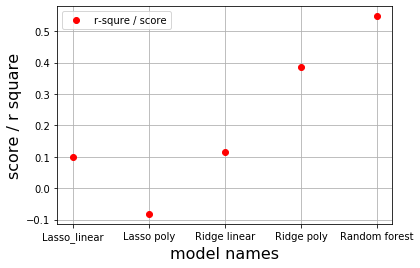

No handles with labels found to put in legend.


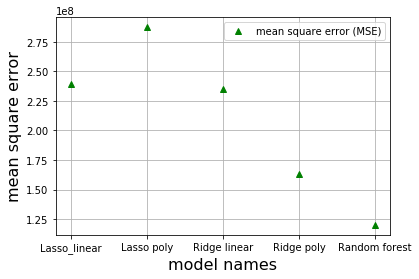

No handles with labels found to put in legend.


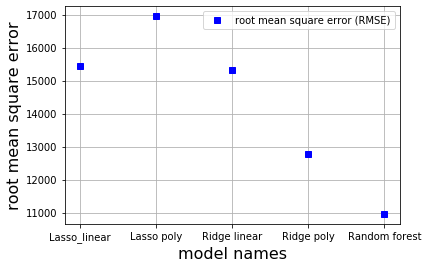

In [149]:
lst_score = [lr_f_score, lr_fp_score, rr_f_score, rr_fp_score, rf_score]
MSE_lst =  [MSE_lr_f, MSE_lr_fp, MSE_rr_f, MSE_rr_fp, MSE_rf]
RMSE_lst =  [RMSE_lr_f, RMSE_lr_fp, RMSE_rr_f, RMSE_rr_fp, RMSE_rf]
model_lst = ['Lasso_linear','Lasso poly', 'Ridge linear', 'Ridge poly', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(loc = 9)
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(loc = 9)
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(loc = 9)
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

# part 5. feature importance
random forest permorms the best,so we are using it for feature importance

Feature importance ranking:
1. feature 0 weighted_categorical_position (0.146243)
2. feature 2 weighted_horizontal_poition (0.132585)
3. feature 1 imdb_votes (0.113381)
4. feature 4 budget (0.063947)
5. feature 7 boxoffice (0.058591)
6. feature 3 imdb_rating (0.058543)
7. feature 8 duration_in_mins (0.054780)
8. feature 6 metacritic_score (0.039783)
9. feature 5 star_category (0.032895)
10. feature 11 lionsgate (0.032398)
11. feature 9 mgm (0.032360)
12. feature 53 other (0.015854)
13. feature 52 paramount (0.015147)
14. feature 10 G (0.014368)
15. feature 18 NC-17 (0.014279)
16. feature 28 NotRated (0.012752)
17. feature 42 PG (0.011803)
18. feature 22 PG-13 (0.010231)
19. feature 30 R (0.008930)
20. feature 23 BAFTA (0.008890)
21. feature 49 Golden Globe (0.008763)
22. feature 15 Oscar (0.006510)
23. feature 27 no award (0.006379)
24. feature 35 other award (0.005494)
25. feature 24 Action (0.005474)
26. feature 50 Adventure (0.005459)
27. feature 20 Animation (0.004901)
28. feature 

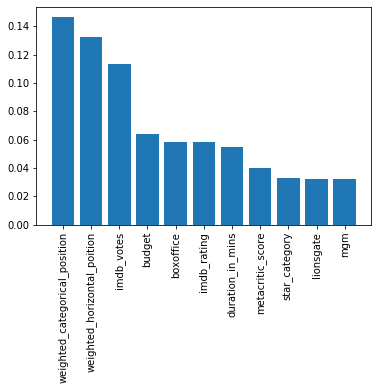

In [150]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_name = model_test_x.columns.get_values()

# Print the feature ranking
print("Feature importance ranking:")

for f in range(model_test_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],  feature_name[f], importances[indices[f]]))
    
plt.figure(1)
plt.bar(feature_name[:11], importances[indices[:11]])
plt.xticks(rotation=90)
plt.show()

## some findings:
1. feature weighted_categorical_position(0.146243) contributes the most to cvt_per_day. videos displayed in category gain more views than those not in. 

2. feature 2 weighted_horizontal_poition (0.132585) contributes the second most to cvt_per_day. in the same row, videos on the left got viewed more than those on the right.when using recommending system, left most video is the most relevant.

3. 1+2 golden triagnle. the first place in the second row gets more views than the second place in the first row.

4. year of the video is the weakest factor. so if old videos are cheaper than newly made films,why not buy more old contents? ppl gonna watch them anyway.